In [1]:
#packages import
import os
os.chdir('..') #cd to PiperNET folder

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.rnaseq_utils import get_config

In [55]:
### Data import ###

#sonicparanoid
sonicpd = pd.read_csv('data/rna-seq/orthologs/runs/piperNET/ortholog_groups/ortholog_groups.tsv', sep='\t', index_col='group_id')
sonicpd = sonicpd.applymap(lambda x: x.split(',') if isinstance(x, str) else x) #turn entrie into lists (instead of strings)
sonicpd = sonicpd.applymap(lambda x: None if x == ['*'] else x) #replace empty entries with None instead of '*' 


#proteomes
config = Path('config/rnaseq_dataprep.yaml')
proteome_list = get_config(config, data='rna-seq', file='proteome_csv')

for sample, path in proteome_list.items():
        proteome_list[sample] = pd.read_csv(path) #update proteome_list with dfs


#prefixes
prefixes = get_config(config, data='rna-seq', file='prefix')
prefixes = {key: str(val) for key, val in prefixes.items()} #convert Path to str 

In [ ]:
### Data cleaning ###

#sonicpd
orths = sonicpd.loc[:, [col for col in sonicpd.columns if 'piper' in col]] #keep only OGs columns
orths.columns = [col.split('.')[0] for col in orths.columns] #remove .pep from col names
orthsmall = orths[:10]

# OGs with PKS (test)

In [60]:
import copy
proteome_list2 = copy.deepcopy(proteome_list)

# Initialize an empty DataFrame
proteomes_all = pd.DataFrame()

# Iterate over each proteome in proteome_list
for sample, proteome in proteome_list2.items():
    
    #add 'sample' column with sample name (e.g., piepr0o9)
    proteome['sample'] = sample
    
    # Remove sample name from column names
    proteome.columns = [col.split('_', 1)[1] if 'rep' in col else col for col in proteome.columns]
    
    # Concatenate the modified dataframe to proteomes_all
    proteomes_all = pd.concat([proteomes_all, proteome], ignore_index=True)

In [4]:
proteome_list['piper09'][proteome_list['piper09']['id'] == 'Pfim_g650_i0.p1']['pfam'].iloc[0][:-3]

'PF00078'

In [58]:
#PRAJIT
#CONVERT proteome_list to unique datframe - DONE
#USE applymap on each entry of orthos (not sonipd)
def check_lists(row, column_header='pfam'):
    for item in orthsmall.columns:
        try:
            for gene in row[item]:
                temp = proteome_list['piper09'][proteome_list['piper09']['id'] == 'Pfim_g650_i0.p1']['pfam'].iloc[0][:-8]
                print(temp)
                try:
                    if (temp == 'PF') or (temp == 'PF02797'):
                        return True
                except KeyError:
                    print(item)
        except TypeError:
            pass

results = []
for index, row in orthsmall.iterrows():
    if(check_lists(row) == True):
        results.append(index)

len(results)

#proteome_list[item][proteome_list[item] == gene][column_header][:-3] == 'PF00195'

PF
PF
PF
PF
PF
PF
PF
PF
PF
PF


10

In [35]:
#Tito
def check_lists(row, column_header='pfam'):
    joined_list = []
    for i in range(len(p_dict)):
        joined_list = joined_list + row[1][i + 4]
    for item in joined_list:
        if (proteome_list[p_dict[item[:4]]].loc[item, column_header][:-3] == 'PF00195') or (proteome_list[p_dict[item[:4]]].loc[item, column_header][:-3] == 'PF02797'):
            return True
            

for row in sonicpd.iterrows():
    if(check_lists(row) != True):
        print(row.index)

IndexError: index 12 is out of bounds for axis 0 with size 12

In [33]:
#copilot
def check_lists(row, column_header='pfam'):
    joined_list = []
    for i in range(len(row[1]) - 4):  # replace 9 with len(row[1]) - 4
        joined_list = joined_list + row[1][i + 4]
    for item in joined_list:
        if (proteome_list[p_dict[item[:4]]].loc[item, column_header][:-3] == 'PF00195') or (proteome_list[p_dict[item[:4]]].loc[item, column_header][:-3] == 'PF02797'):
            return True

for row in sonicpd.iterrows():
    if(check_lists(row) != True):
        print(row.index)

KeyError: 'Pdil'

# OGs stats

Total N° of ogroups: 114326


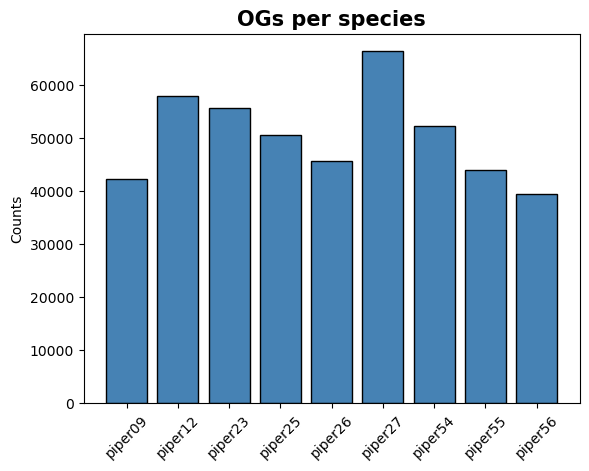

In [4]:
### OGs per species ###
n_orths = orths.shape[0] #total N° of OGs
print('Total N° of ogroups:', n_orths)

orths_sp = orths.count() #OGs per species

#plot
plt.bar(orths_sp.index, orths_sp, color='steelblue', edgecolor='black')
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.title('OGs per species', fontsize=15, fontweight='bold')
plt.show()

OGs size range: 2 - 627


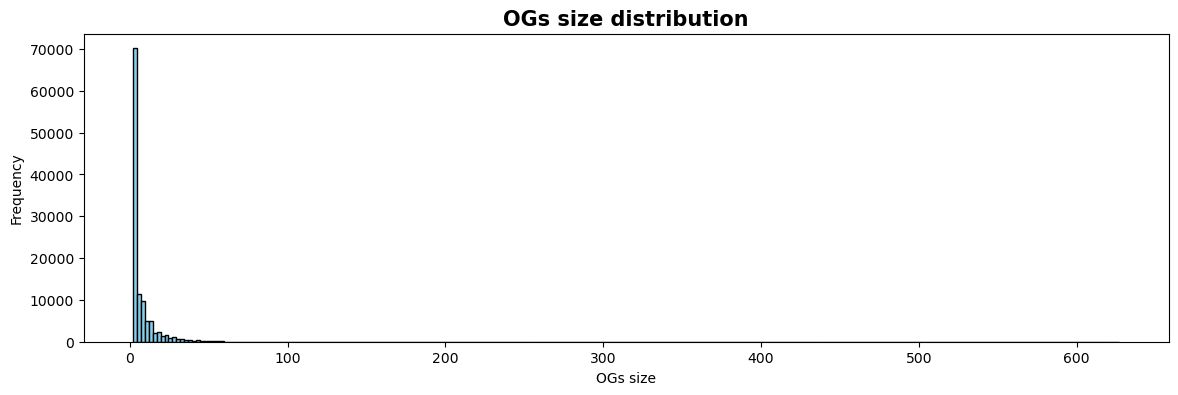

In [5]:
### Distribution of OGs size ###
orths_size = sonicpd['group_size']
print('OGs size range:', orths_size.min(), '-', orths_size.max())

#plot
plt.figure(figsize=(14, 4))
plt.hist(orths_size, bins=250, color='skyblue', edgecolor='black')
plt.title('OGs size distribution', fontsize=15, fontweight='bold')
plt.xlabel('OGs size')
plt.ylabel('Frequency')
plt.show()

Total N° of ogroups: 114326


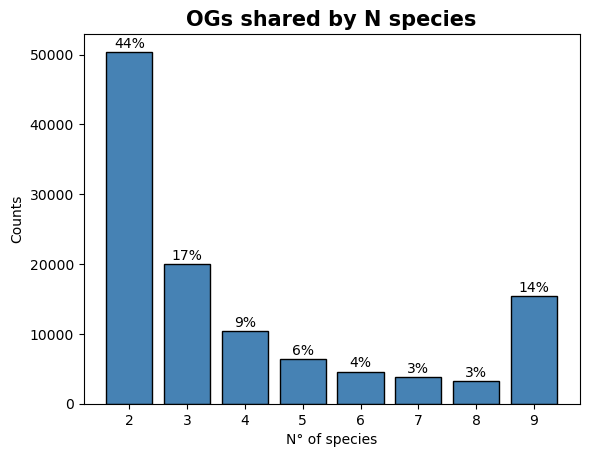

In [16]:
### OGs shared by N species ###
print('Total N° of ogroups:', n_orths) #total n° OGs

#OGs shared by N species
shared_orths = pd.DataFrame(sonicpd['sp_in_grp'].value_counts().sort_index().reset_index().rename(columns={'index': 'n_species',
                                                                                                        'sp_in_grp': 'shared_OGs'}))

shared_orths['percentage'] = round((shared_orths['shared_OGs'] / n_orths) * 100).astype(int) #calculate percentage

#plot
plt.bar(shared_orths['n_species'], shared_orths['shared_OGs'], color='steelblue', edgecolor='black')
plt.xlabel('N° of species')
plt.ylabel('Counts')
plt.title('OGs shared by N species', fontsize=15, fontweight='bold')

#add percentage to plot
for i, value in enumerate(shared_orths['percentage']):
    plt.text(shared_orths['n_species'][i], shared_orths['shared_OGs'][i] + 200, f"{value}%", ha='center', va='bottom')

plt.show()

In [17]:
### OGs table with Expression values ###

#create unique dict with proteinID - (summed)TPM pairs for all species
tpm_all = {}

for species, proteome in proteome_list.items():
    print(f'Processing {species}...')

    #keep only TPM columns
    expr_data = proteome.loc[:, [col for col in proteome.columns if 'rep' in col]]
    
    #(optional) exclude fruit columns
    expr_data = expr_data.loc[:, ~expr_data.columns.str.contains('fr')]
    
    #get protein ids and summed TPMs
    ids = list(expr_data.index)
    tpm_sum = list(expr_data.sum(axis=1))
    
    #dict proteinID-TPMsum pairs for the species being processed
    tpm_sp = dict(zip(ids, tpm_sum))
    tpm_all.update(tpm_sp) #append to the unique dict



#assign expression to orthogroup (sum of TPM of individual genes)
def assign_orth_expr(ogroup, tpm_dict=tpm_all):

    count = 0

    for gene in ogroup:
        
        try:
            #retrieve gene expression value from the reference dict
            count += tpm_dict[gene]
        except KeyError:
            pass  # Do nothing if key is not found
    return count


def assign_orth_expr(ogroup, tpm_dict=tpm_all):
    return sum(tpm_dict.get(gene, 0) for gene in ogroup)

#apply assign_orth_expr to each entry sonicpd
orths_expr = orths.applymap(lambda x: assign_orth_expr(x, tpm_all) if x is not None else 0)

Processing piper09...
Processing piper12...
Processing piper23...
Processing piper25...
Processing piper26...
Processing piper27...
Processing piper54...
Processing piper55...
Processing piper56...


In [ ]:
!

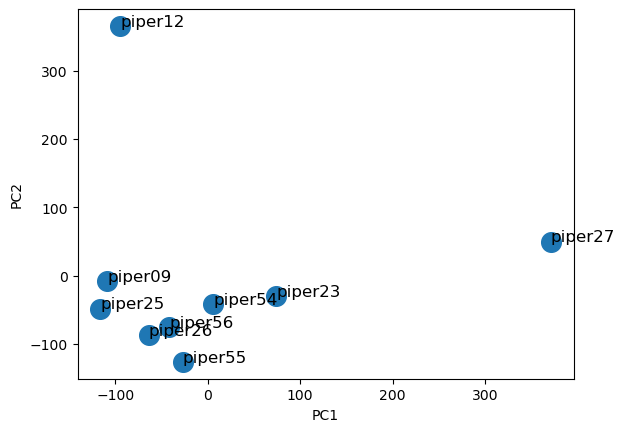

In [19]:
##### PCA #####

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#normalization
data = orths_expr.T
scaler = StandardScaler()
data = scaler.fit_transform(data)

#pca
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data) #samples as rows 
pca_result = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=orths_expr.columns)

#scatter plot
fig, ax = plt.subplots()
ax.scatter(pca_result['PC1'], pca_result['PC2'], s=200) #, c=colors[:len(pca_result)]
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
    
#annotate samples
for i, txt in enumerate(pca_result.index):
    ax.annotate(txt, (pca_result['PC1'][i], pca_result['PC2'][i]), fontsize=12)

plt.show()

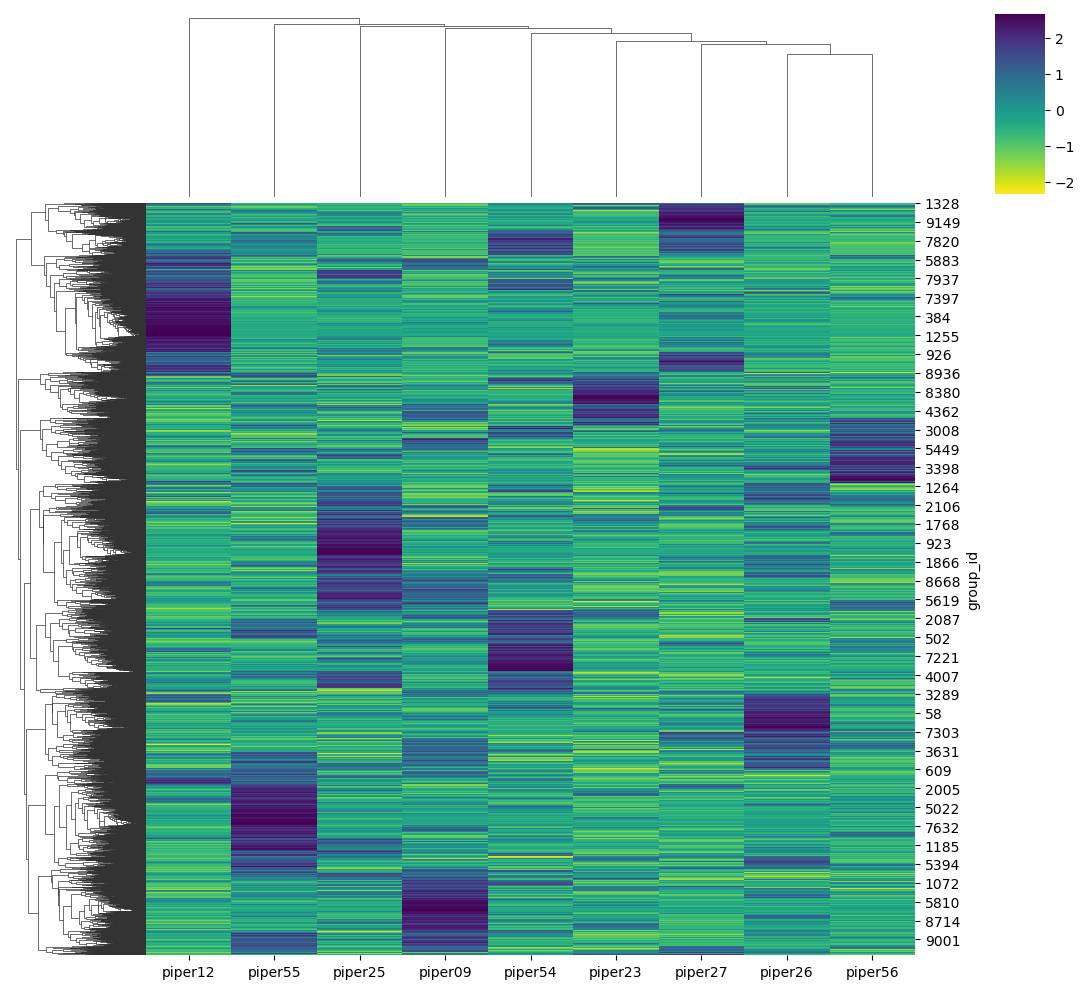

In [9]:
### Heatmap ###

data = orths_expr[orths_expr.apply(lambda row: row.sum() != 0, axis=1)] #remove only-zero rows
data = data.loc[:10000, :]
sns.clustermap(data, z_score=0, cmap="viridis_r", metric='euclidean', dendrogram_ratio=(.15, .2), cbar_pos=(1.0, 0.8, 0.05, 0.18))
plt.show()

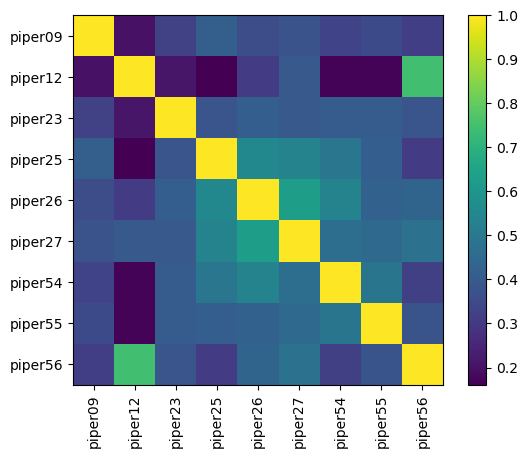

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
data = orths_expr
mat = cosine_similarity(data.T)
plt.imshow(mat, interpolation='nearest')
plt.xticks(ticks=range(len(data.columns)), labels=data.columns, rotation=90)
plt.yticks(ticks=range(len(data.columns)), labels=data.columns)
plt.colorbar()